In [163]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [67]:
df = pd.read_csv("Fraud.csv")

In [68]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [71]:
# checking for null values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [72]:
# checking for duplicate values 
df.duplicated().sum()

0

In [73]:
# checking for imbalance data 

df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [74]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [75]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribustion of Tansaction Types')

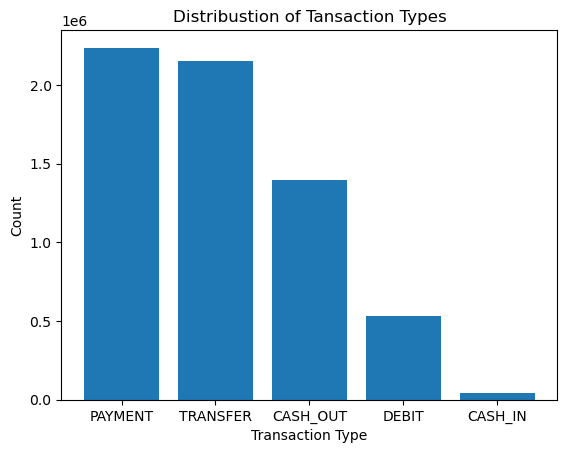

In [76]:
fig, ax = plt.subplots()
ax.bar(df["type"].unique(), df["type"].value_counts())
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title("Distribustion of Tansaction Types")

In [77]:
#splitting Numerical and categoria

numerical_columns = df.select_dtypes(exclude=["object"])

categorical_cols = df.select_dtypes(include=["object"])


In [78]:
numerical_columns.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [79]:
categorical_cols.columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

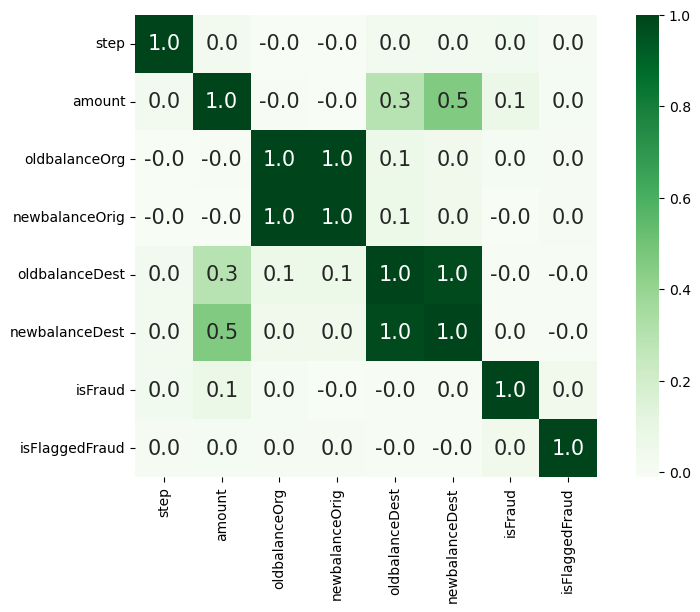

In [63]:
# plotting a heatmap to check correlation between the columns 

corr = numerical_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True,
           annot_kws={'size': 15}, cmap='Greens')
plt.show()

In [80]:
# as we can see in heatmap there is high multicolinearity between oldbalanceDest and newBalanceDest
# and between oldBalanceOrg and NewBalanceOrg so we will drop oldbalace data and also dropping isFlaggedFraud beacause its highly imbalace

df.drop(columns=['oldbalanceOrg', 'oldbalanceDest','isFlaggedFraud'],axis=1, inplace= True)


In [81]:
df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0


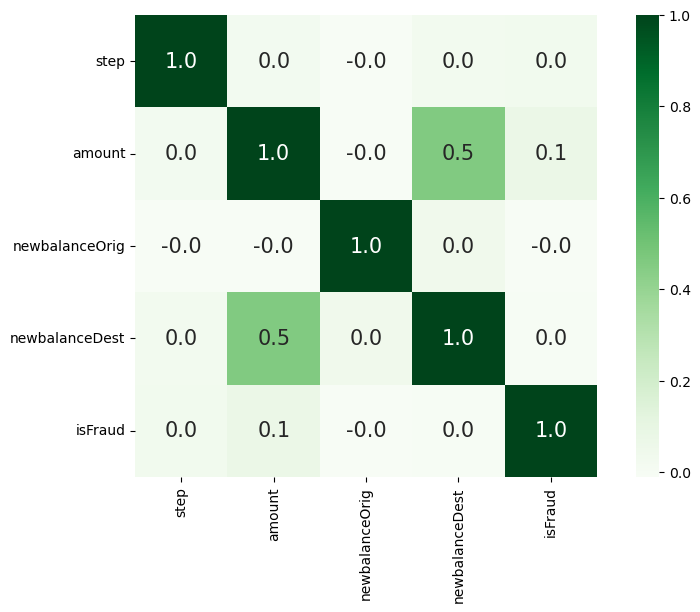

In [82]:
numeric_columns = df.select_dtypes(exclude=["object"])

correlation = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True,
           annot_kws={'size': 15}, cmap='Greens')
plt.show()

In [83]:
# checking for the trasaction type where most number of fraud heppend

fraud_occur = df[df["isFraud"]==1]['type'].value_counts()
fraud_occur


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

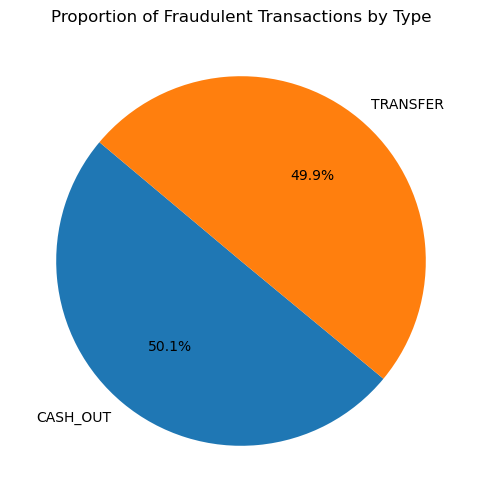

In [84]:
# all fraud trasaction happend by CASH_OUT or TRANSFER
plt.figure(figsize=(6, 6))
plt.pie(fraud_occur, labels=fraud_occur.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent Transactions by Type')
plt.show()

In [117]:
new_df = df
df_new = df

In [118]:
new_df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0


In [119]:
# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df_new)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: isFraud, Percentage of outliers: 0.13%


In [120]:
# removing outliers 
# selecting qunatile for numeric columns

Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

IQR = Q3 - Q1


def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range
    

    
    

In [121]:
lower_limit, higher_limit = remove_outlier(new_df['newbalanceDest'])
new_df['newbalanceDest'] = np.where(new_df['newbalanceDest']>higher_limit,
                                     higher_limit,
                                      np.where(new_df['newbalanceDest']<lower_limit,
                                              lower_limit,
                                              new_df['newbalanceDest']))

In [122]:
lower_limit, higher_limit = remove_outlier(new_df['newbalanceOrig'])
new_df['newbalanceOrig'] = np.where(new_df['newbalanceOrig']>higher_limit,
                                     higher_limit,
                                      np.where(new_df['newbalanceOrig']<lower_limit,
                                              lower_limit,
                                              new_df['newbalanceOrig']))

In [123]:
new_df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0


In [124]:
# one hot  encoding 

new_df = pd.get_dummies(new_df, columns=["type"])

In [125]:
new_df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.0,0,False,False,False,True,False
1,1,1864.28,C1666544295,19384.72,M2044282225,0.0,0,False,False,False,True,False
2,1,181.00,C1305486145,0.00,C553264065,0.0,1,False,False,False,False,True
3,1,181.00,C840083671,0.00,C38997010,0.0,1,False,True,False,False,False
4,1,11668.14,C2048537720,29885.86,M1230701703,0.0,0,False,False,False,True,False


In [126]:
# encoding "nameOrig" and nameDest
le=LabelEncoder()
new_df['nameOrig']=le.fit_transform(new_df['nameOrig'])
new_df['nameDest']=le.fit_transform(new_df['nameDest'])

In [127]:
new_df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,160296.36,1662094,0.0,0,False,False,False,True,False
1,1,1864.28,2188998,19384.72,1733924,0.0,0,False,False,False,True,False
2,1,181.00,1002156,0.00,439685,0.0,1,False,False,False,False,True
3,1,181.00,5828262,0.00,391696,0.0,1,False,True,False,False,False
4,1,11668.14,3445981,29885.86,828919,0.0,0,False,False,False,True,False


In [128]:
# splitting

X = new_df.drop(["isFraud"], axis=1)
y =new_df["isFraud"]

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(x, y)

In [129]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegession

In [143]:
#training the model
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_pred = lr.predict(X_test)


LogisticRegression(max_iter=500)

In [168]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the test data

y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

In [170]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)

# Make predictions on the test data

y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

In [177]:
# Print scores of our classifiers
print("Logistic regression:", accuracy)
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Logistic regression: 70.87135488210832
Decision Tree Score:  99.92086593258752
Random Forest Score:  99.95214235645065


LOgistic regression: 70.87135488210832


In [145]:
# Evaluate the model for logistic regression
accuracy = accuracy_score(y_test, y_pred) *100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 70.87135488210832
Precision: 0.0016205310480244376
Recall: 0.37037037037037035
F1 Score: 0.0032269428212623264
ROC AUC: 0.5397575997814096
Confusion Matrix:
[[901255 369649]
 [  1020    600]]


In [172]:
# Evaluate the model for decision tree 
accuracy_dt = accuracy_score(y_test, y_pred_dt) *100
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')
print(f'ROC AUC: {roc_auc_dt}')
print(f'Confusion Matrix:\n{conf_matrix_dt}')

Accuracy: 99.92086593258752
Precision: 0.6838632273545291
Recall: 0.7037037037037037
F1 Score: 0.0032269428212623264
ROC AUC: 0.8516445191186163
Confusion Matrix:
[[1270377     527]
 [    480    1140]]


In [173]:
# Evaluate the model for random forest
accuracy_rf= accuracy_score(y_test, y_pred_rf) *100
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'ROC AUC: {roc_auc_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')

Accuracy: 99.95214235645065
Precision: 0.9302127659574468
Recall: 0.6746913580246914
F1 Score: 0.0032269428212623264
ROC AUC: 0.8373134185111593
Confusion Matrix:
[[1270822      82]
 [    527    1093]]


In [175]:
# classification report - DT

classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")


# classification report - RF

classification_report_lr = classification_report(y_test, y_pred)
print("Classification Report - Logistic regression")
print(classification_report_lr)


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.68      0.70      0.69      1620

    accuracy                           1.00   1272524
   macro avg       0.84      0.85      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.67      0.78      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------------------------------------------------------
Classification Report - Logistic regression
              precision    recall  f1-score   su

random forest is performing with better precision and accuracy among these models

## Asked questions 

1. Data cleaning including missing values, outliers and multi-collinearity

    There were high  multicollinearity between oldbalanceDest and newbalancedest, also between oldbalanceorig and newbalanceorig so i drop  one column from each. because it makes it difficult to determine the individual effect of each independent variable on the dependent variable, and affects the model performance, and i also removed isflaggedFraud beacause there were high imbalance data.

2. Describe your fraud detection model in elaboration. 

    This Fraud detection model utilizes a combination of advanced machine learning algorithms and and data preprocessing,    Exploratory data analysis(EDA)
    here are steps 
- Data preprocessing 
- Exploratory data analysis(EDA)
- Feature selection 
- Model selection and Training 
- Model evaluation

3. How did you select variables to be included in the model?

    I selected the variables after performing EDA and analysing the the variable which can be important. 


4. What are the key factors that predict fraudulent customer? 

    the key factor were the type-  PAYMENT, CASH_IN, CASH_OUT, TRASFER, DABIT, by analysing the data we got to know that all fraud which ouccurs were either type-TRANSFER, or Type-CASH_OUT.

5. Do these factors make sense? If yes, How? If not, How not? 

    Yes these factos makes sanse because i find out these factor by analysing data, chekcing for multi-collinearity, and correlation. 

6. . What kind of prevention should be adopted while company update its infrastructure?

    Company can detect the customer with higher risk of fraud, by identifing pattern in transactions, and also can makek a fraud alert system which can prevent wasting of time. 

7. Assuming these actions have been implemented, how would you determine if they work?

    After impimenting the model we can match the data and compare it with previous data if the number of fraud cases decrease we can assume the our implimentations are working 









